<a href="https://colab.research.google.com/github/Megha-govt/megha-gowda/blob/main/root2ai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Processing texts
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Others
import numpy as np
from collections import Counter
import time
from statistics import mean

In [5]:
data = pd.read_csv("/content/root2ai.csv", encoding="latin-1")
data = data.dropna(how = "any", axis = 0)
data.columns = ['Text','Target']
data.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [6]:
print(f"Input data has {len(data)} rows and {len(data.columns)} columns.")

Input data has 22701 rows and 2 columns.


In [7]:
data['Target'].value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        974
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

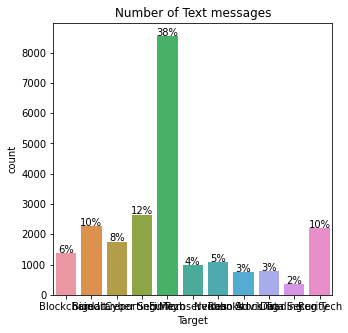

In [8]:
total = len(data)
plt.figure(figsize = (5, 5))
plt.title("Number of Text messages")
ax = sns.countplot(x = 'Target', data = data)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

In [9]:
print(data['Text'].isnull().sum())
print(data['Target'].isnull().sum())

0
0


In [10]:
# Text_len
data['Text_len'] = data['Text'].apply(lambda a: len(a) - a.count(" "))

In [11]:
# punct%
def count_punct(Text):
    count = sum([1 for char in Text if char in string.punctuation])
    return round(count/(len(Text) - Text.count(" ")), 3) * 100
data['punct%'] = data.Text.apply(lambda x: count_punct(x))

data.head()

,Text,Target,Text_len,punct%
0,reserve bank forming expert committee based in...,Blockchain,139,0.0
1,director could play role financial system,Blockchain,36,0.0
2,preliminary discuss secure transaction study r...,Blockchain,55,0.0
3,security indeed prove essential transforming f...,Blockchain,95,0.0
4,bank settlement normally take three days based...,Blockchain,89,0.0


bins = np.linspace(0, 200, 40)
data.loc[data.label == 'spam', 'body_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'spam')
data.loc[data.label == 'ham', 'body_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'ham')
plt.legend(loc = 'best')
plt.xlabel("body_len")
plt.title("Body length ham vs spam")
plt.show()

In [12]:
data[['Text_len', 'punct%']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Text_len,22701.0,63.170874,49.019164,4.0,31.0,54.0,83.0,1390.0
punct%,22701.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [13]:
list(data.loc[data.Text_len == 1390, 'Text'])

['disruptive credit information industry data category purpose scope world bank group role data data facilitate data provision accordance general create legal regulatory ensure data subject build appropriate capacity supervisor oversight framework distributed ledger technology credit information system trade commercial create legal regulatory ensure compliance build appropriate capacity supervisor ensure overall legal regulatory framework credit clear predictable nondiscriminatory proportionate supportive data subject consumer increase security reliability compliance payment retail remittance government facilitate data provision accordance create legal regulatory build appropriate capacity supervisor lead increase financial inclusion cloud ensure alignment create legal regulatory support supervision regulatory capacity building biometric ensure alignment create legal regulatory accordance business peer peer ensure alignment create legal regulatory potential data educate importance cred

In [14]:
# Text with maximum punct%
list(data.loc[data['punct%'] == 0.0, 'Text'])

['reserve bank forming expert committee based institute development research banking technology study approach distributed ledger technology help support shift',
 'director could play role financial system',
 'preliminary discuss secure transaction study research payment',
 'security indeed prove essential transforming financial system part effort move away heavy reliance cash based',
 'bank settlement normally take three days based payment verification technology take less tier security',
 'agarwal head bank',
 'several data security regulatory oversight would need widely financial system',
 'relevance transaction register available publicly sequential record serve effective tool transaction settlement among different payment chain chief risk officer global business',
 'technology need transaction intermediary clearinghouse financial establishment thus quick secure inexpensive',
 'seven bank morgan chase already support certain cross border fortune',
 'meanwhile bank digital division 

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


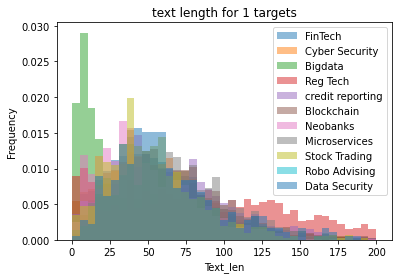

In [15]:
# Plot text_len distribution for targets messages 
bins = np.linspace(0, 200, 40)
data.loc[data.Target == 'FinTech', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'FinTech')
data.loc[data.Target == 'Cyber Security', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Cyber Security')
data.loc[data.Target == 'Bigdata', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Bigdata')
data.loc[data.Target == 'Reg Tech', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Reg Tech')
data.loc[data.Target == 'credit reporting', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'credit reporting')

data.loc[data.Target == 'Blockchain', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Blockchain')
data.loc[data.Target == 'Neobanks', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Neobanks')
data.loc[data.Target == 'Microservices', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Microservices')
data.loc[data.Target == 'Stock Trading', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Stock Trading')
data.loc[data.Target == 'Robo Advising ', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Robo Advising ')

data.loc[data.Target == 'Data Security', 'Text_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Data Security')

plt.legend(loc = 'best')
plt.xlabel("Text_len")
plt.title("text length for 1 targets")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


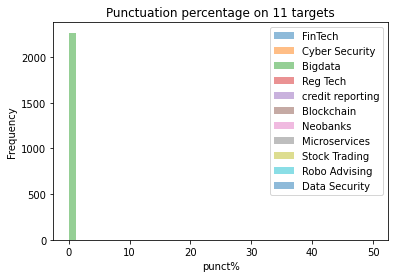

In [16]:
# Plot punct% for ham and spam messages 
bins = np.linspace(0, 50, 40)
data.loc[data.Target == 'FinTech', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'FinTech')
data.loc[data.Target == 'Cyber Security', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Cyber Security')
data.loc[data.Target == 'Bigdata', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = False, label = 'Bigdata')
data.loc[data.Target == 'Reg Tech', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Reg Tech')
data.loc[data.Target == 'credit reporting', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'credit reporting')

data.loc[data.Target == 'Blockchain', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Blockchain')
data.loc[data.Target == 'Neobanks', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Neobanks')
data.loc[data.Target == 'Microservices', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Microservices')
data.loc[data.Target == 'Stock Trading', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Stock Trading')
data.loc[data.Target == 'Robo Advising ', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Robo Advising ')

data.loc[data.Target == 'Data Security', 'punct%'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Data Security')

plt.legend(loc = 'best')
plt.xlabel("punct%")
plt.title("Punctuation percentage on 11 targets")
plt.show()

#no punctuation in data hence no results

# Cleaning **text** **

*   Turn words into lowercase letters only
*   Remove punctuation
*  Tokenize words
*  Remove stopwords
*   Stemming vs lemmatization (text normalizations)


In [17]:
dir(re)

['A',
 'ASCII',
 'DEBUG',
 'DOTALL',
 'I',
 'IGNORECASE',
 'L',
 'LOCALE',
 'M',
 'MULTILINE',
 'Match',
 'Pattern',
 'RegexFlag',
 'S',
 'Scanner',
 'T',
 'TEMPLATE',
 'U',
 'UNICODE',
 'VERBOSE',
 'X',
 '_MAXCACHE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_cache',
 '_compile',
 '_compile_repl',
 '_expand',
 '_locale',
 '_pickle',
 '_special_chars_map',
 '_subx',
 'compile',
 'copyreg',
 'enum',
 'error',
 'escape',
 'findall',
 'finditer',
 'fullmatch',
 'functools',
 'match',
 'purge',
 'search',
 'split',
 'sre_compile',
 'sre_parse',
 'sub',
 'subn',
 'template']

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
# Examples of stopwords 
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

In [20]:
# Remove punctuation 
text = 'OMG! Did you see what happened to her? I was so shocked when I heard the news. :('
print(text)
text = "".join([word for word in text if word not in string.punctuation])
print(text)

OMG! Did you see what happened to her? I was so shocked when I heard the news. :(
OMG Did you see what happened to her I was so shocked when I heard the news 


In [21]:

print(text)
print(text.lower().split())
print([word for word in text.lower().split() if word not in stopwords])

OMG Did you see what happened to her I was so shocked when I heard the news 
['omg', 'did', 'you', 'see', 'what', 'happened', 'to', 'her', 'i', 'was', 'so', 'shocked', 'when', 'i', 'heard', 'the', 'news']
['omg', 'see', 'happened', 'shocked', 'heard', 'news']


In [22]:
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [23]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [24]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


In [25]:
# Create function for cleaning text  
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.findall('\S+', text)
    # text = [ps.stem(word) for word in tokens if word not in stopwords]
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

# Apply function to body_text 
data['cleaned_text'] = data['Text'].apply(lambda x: clean_text(x))
data[['Text', 'cleaned_text']].head(10)

,Text,cleaned_text
0,reserve bank forming expert committee based in...,"[reserve, bank, forming, expert, committee, ba..."
1,director could play role financial system,"[director, could, play, role, financial, system]"
2,preliminary discuss secure transaction study r...,"[preliminary, discus, secure, transaction, stu..."
3,security indeed prove essential transforming f...,"[security, indeed, prove, essential, transform..."
4,bank settlement normally take three days based...,"[bank, settlement, normally, take, three, day,..."
5,agarwal head bank,"[agarwal, head, bank]"
6,several data security regulatory oversight wou...,"[several, data, security, regulatory, oversigh..."
7,relevance transaction register available publi...,"[relevance, transaction, register, available, ..."
8,technology need transaction intermediary clear...,"[technology, need, transaction, intermediary, ..."
9,seven bank morgan chase already support certai...,"[seven, bank, morgan, chase, already, support,..."


In [26]:
# Collect target = Fintech words
fin_words = list(data.loc[data.Target == 'FinTech', 'cleaned_text'])

# Flatten list of lists
fin_words = list(np.concatenate(fin_words).flat)

# Create dictionary to store word frequency
fin_words = Counter(fin_words)
pd.DataFrame(fin_words.most_common(50), columns = ['word', 'frequency'])

,word,frequency
0,financial,1389
1,data,605
2,business,568
3,digital,554
4,innovation,538
5,bank,520
6,technology,498
7,banking,488
8,also,449
9,need,431


In [27]:
# Collect target = Cyber security words
cyber_words = list(data.loc[data.Target == 'Cyber Security', 'cleaned_text'])

# Flatten list of lists
cyber_words = list(np.concatenate(cyber_words).flat)

# Create dictionary to store word frequency
cyber_words = Counter(cyber_words)
pd.DataFrame(cyber_words.most_common(50), columns = ['word', 'frequency'])

,word,frequency
0,security,546
1,financial,429
2,digital,397
3,data,363
4,information,240
5,payment,199
6,risk,190
7,sector,166
8,also,165
9,technology,161


In [28]:
# Collect target = Reg tech words
regtech_words = list(data.loc[data.Target == 'Reg Tech', 'cleaned_text'])

# Flatten list of lists
regtech_words = list(np.concatenate(regtech_words).flat)

# Create dictionary to store word frequency
regtech_words = Counter(regtech_words)
pd.DataFrame(regtech_words.most_common(50), columns = ['word', 'frequency'])



# Collect target = credit reporting words
credit_words = list(data.loc[data.Target == 'credit reporting', 'cleaned_text'])

# Flatten list of lists
credit_words = list(np.concatenate(credit_words).flat)

# Create dictionary to store word frequency
credit_words = Counter(credit_words)
pd.DataFrame(credit_words.most_common(50), columns = ['word', 'frequency'])

,word,frequency
0,credit,1031
1,data,746
2,information,336
3,financial,275
4,alternative,213
5,bank,173
6,tech,155
7,consumer,148
8,business,131
9,also,119


In [29]:
# Collect target = Blockchain words
blockchain_words = list(data.loc[data.Target == 'Blockchain', 'cleaned_text'])

# Flatten list of lists
blockchain_words = list(np.concatenate(blockchain_words).flat)

# Create dictionary to store word frequency
blockchain_words = Counter(blockchain_words)
pd.DataFrame(blockchain_words.most_common(50), columns = ['word', 'frequency'])

,word,frequency
0,technology,140
1,data,129
2,system,125
3,digital,95
4,based,83
5,paper,82
6,need,80
7,would,78
8,chain,76
9,network,76


In [30]:
# Collect target = Neobanks words
neobanks_words = list(data.loc[data.Target == 'Neobanks', 'cleaned_text'])

# Flatten list of lists
neobanks_words = list(np.concatenate(neobanks_words).flat)

# Create dictionary to store word frequency
neobanks_words = Counter(neobanks_words)
pd.DataFrame(neobanks_words.most_common(50), columns = ['word', 'frequency'])

,word,frequency
0,banking,148
1,bank,143
2,customer,97
3,digital,78
4,traditional,66
5,account,65
6,financial,65
7,million,61
8,billion,57
9,market,54


In [31]:
# Collect target = Microservices words
microservices_words = list(data.loc[data.Target == 'Microservices', 'cleaned_text'])

# Flatten list of lists
microservices_words = list(np.concatenate(microservices_words).flat)

# Create dictionary to store word frequency
microservices_words = Counter(microservices_words)
pd.DataFrame(microservices_words.most_common(50), columns = ['word', 'frequency'])

,word,frequency
0,application,190
1,system,151
2,architecture,132
3,service,86
4,data,75
5,financial,70
6,design,62
7,cloud,58
8,time,55
9,also,54


In [32]:
# Collect target = Stock Trading words
stock_words = list(data.loc[data.Target == 'Stock Trading', 'cleaned_text'])

# Flatten list of lists
stock_words = list(np.concatenate(stock_words).flat)

# Create dictionary to store word frequency
stock_words = Counter(stock_words)
pd.DataFrame(stock_words.most_common(50), columns = ['word', 'frequency'])

,word,frequency
0,stock,260
1,market,191
2,trading,110
3,volatility,104
4,price,101
5,order,87
6,exchange,63
7,effect,61
8,data,59
9,model,57


In [33]:
# Collect target = Robo Advising words
robo_words = list(data.loc[data.Target == 'Robo Advising', 'cleaned_text'])

# Flatten list of lists
robo_words = list(np.concatenate(robo_words).flat)

# Create dictionary to store word frequency
robo_words = Counter(robo_words)
pd.DataFrame(robo_words.most_common(50), columns = ['word', 'frequency'])

,word,frequency
0,investment,140
1,advisory,135
2,financial,113
3,trust,75
4,asset,72
5,risk,69
6,management,65
7,human,57
8,portfolio,54
9,advisor,45


In [34]:
# Collect target = Data Security words
datasecurity_words = list(data.loc[data.Target == 'Data Security', 'cleaned_text'])

# Flatten list of lists
datasecurity_words = list(np.concatenate(datasecurity_words).flat)

# Create dictionary to store word frequency
datasecurity_words = Counter(datasecurity_words)
pd.DataFrame(datasecurity_words.most_common(50), columns = ['word', 'frequency'])

,word,frequency
0,data,241
1,security,61
2,protection,51
3,personal,45
4,also,42
5,privacy,34
6,financial,33
7,customer,30
8,bill,29
9,information,26


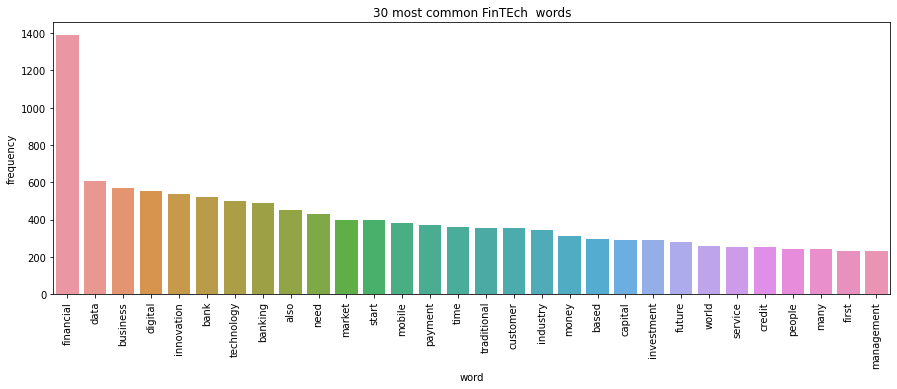

In [35]:
# Define extra stopwords
extra_stopwords = ['u', 'im', '2', 'ur', 'ill', '4', 'lor', 'r', 'n', 'da', 'oh']

# Remove extra stopwords  # Organise ham words data
fin_words = list(data.loc[data.Target == 'FinTech', 'cleaned_text'])
fin_words = list(np.concatenate(fin_words).flat)
fin_words = Counter(fin_words)
fin_words = pd.DataFrame(fin_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common harm words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = fin_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common FinTEch  words")
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: [word for word in x if word not in extra_stopwords])

Text(0.5, 1.0, '30 most common cyber_words words')

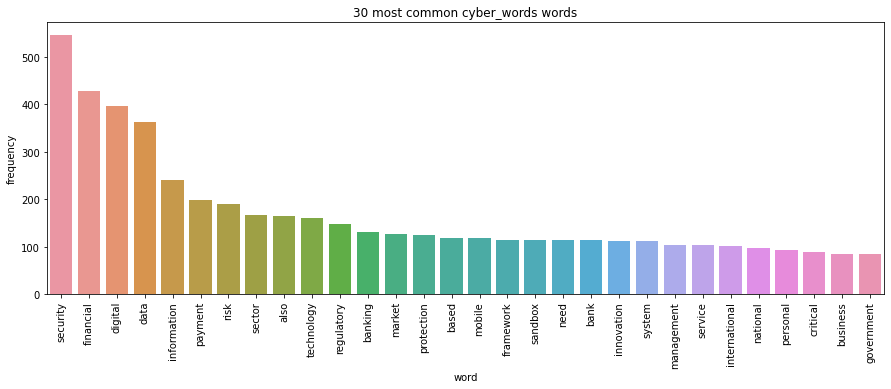

In [36]:
# Organise cyber_words words data
cyber_words = list(data.loc[data.Target == 'Cyber Security', 'cleaned_text'])
cyber_words = list(np.concatenate(cyber_words).flat)
cyber_words = Counter(cyber_words)
cyber_words = pd.DataFrame(cyber_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common harm words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = cyber_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common cyber_words words")

Text(0.5, 1.0, '30 most common credit reporting words')

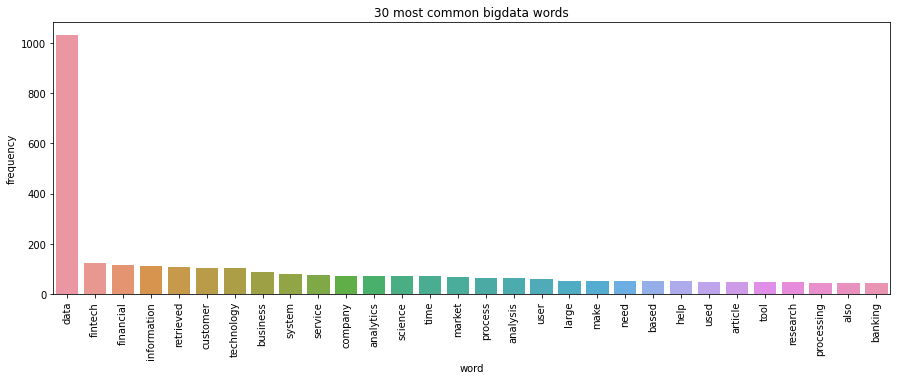

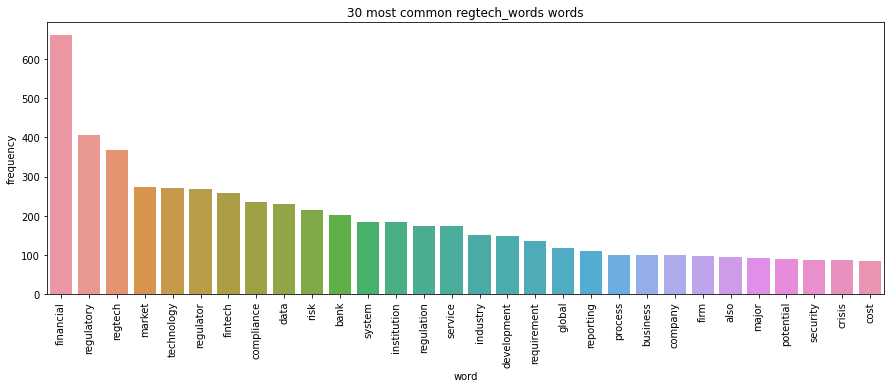

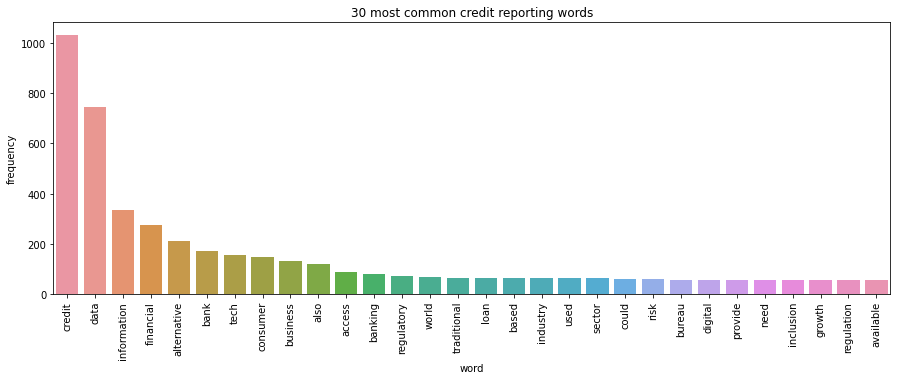

In [37]:
# Organise Bigdata words data
bigdata_words = list(data.loc[data.Target == 'Bigdata', 'cleaned_text'])
bigdata_words = list(np.concatenate(bigdata_words).flat)
bigdata_words = Counter(bigdata_words)
bigdata_words = pd.DataFrame(bigdata_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common bigdata words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = bigdata_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common bigdata words")


# Organise Reg Tech words data
regtech_words = list(data.loc[data.Target == 'Reg Tech', 'cleaned_text'])
regtech_words = list(np.concatenate(regtech_words).flat)
regtech_words = Counter(regtech_words)
regtech_words = pd.DataFrame(regtech_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common regtech_words words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = regtech_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common regtech_words words")

# Organise credit reporting words data
credit_words = list(data.loc[data.Target == 'credit reporting', 'cleaned_text'])
credit_words = list(np.concatenate(credit_words).flat)
credit_words = Counter(credit_words)
credit_words = pd.DataFrame(credit_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common credit reporting words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = credit_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common credit reporting words")

Text(0.5, 1.0, '30 most common Blockchain words')

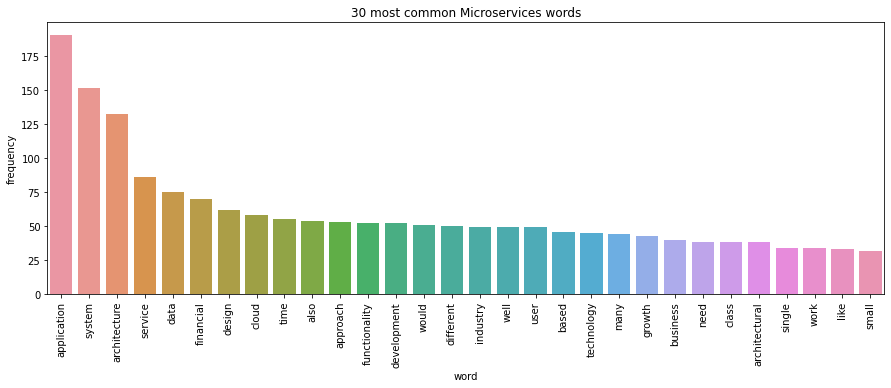

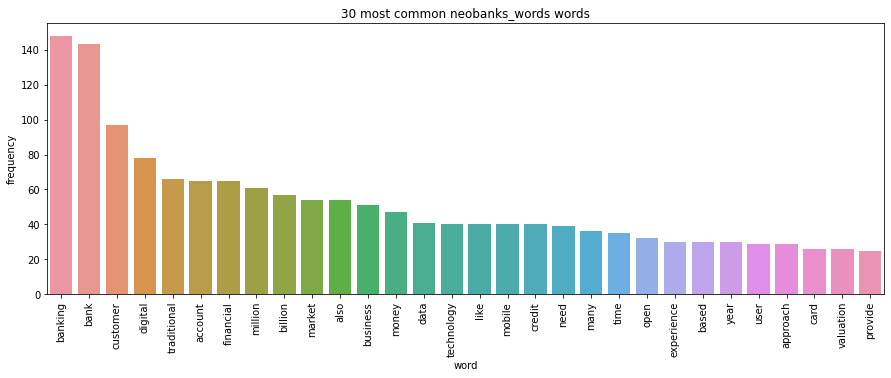

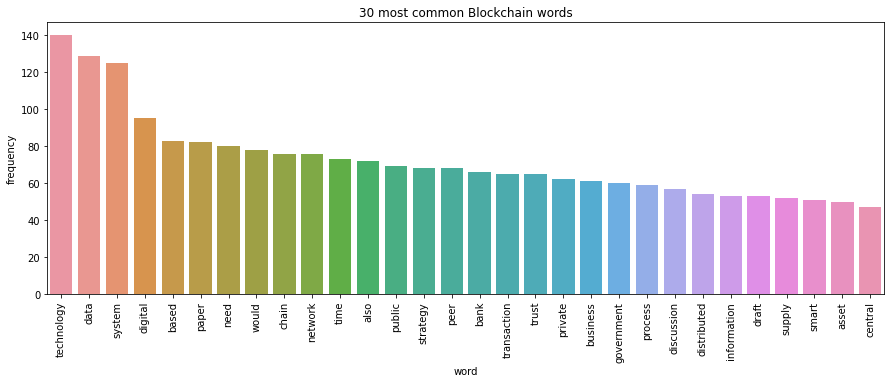

In [38]:
# Organise Microservices data
microservices_words = list(data.loc[data.Target == 'Microservices', 'cleaned_text'])
microservices_words = list(np.concatenate(microservices_words).flat)
microservices_words = Counter(microservices_words)
microservices_words = pd.DataFrame(microservices_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common Microservices words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = microservices_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common Microservices words")


# Organise Neobanks words data
neobanks_words = list(data.loc[data.Target == 'Neobanks', 'cleaned_text'])
neobanks_words = list(np.concatenate(neobanks_words).flat)
neobanks_words = Counter(neobanks_words)
neobanks_words = pd.DataFrame(neobanks_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common Neobanks words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = neobanks_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common neobanks_words words")

# Organise Blockchain words data
blockchain_words = list(data.loc[data.Target == 'Blockchain', 'cleaned_text'])
blockchain_words = list(np.concatenate(blockchain_words).flat)
blockchain_words = Counter(blockchain_words)
blockchain_words = pd.DataFrame(blockchain_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common Blockchain words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = blockchain_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common Blockchain words")

Text(0.5, 1.0, '30 most common Stock Trading words')

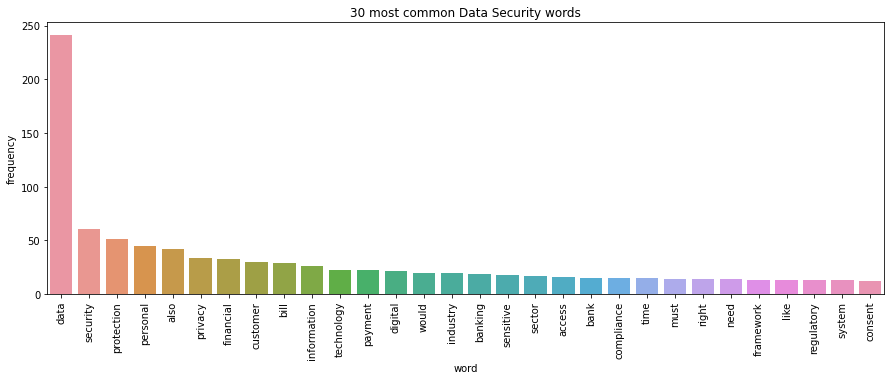

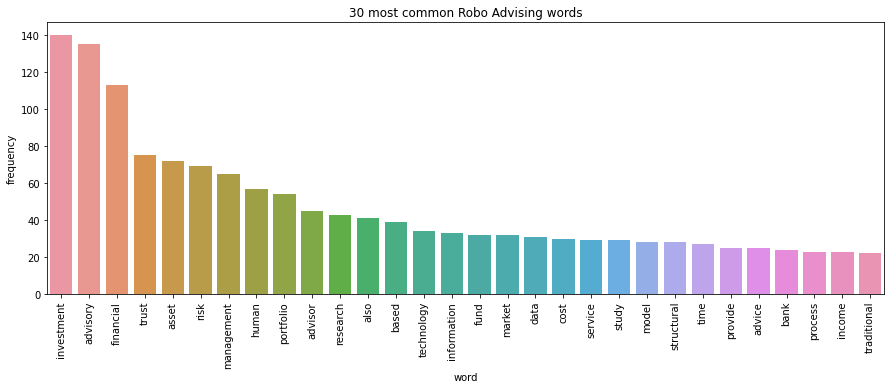

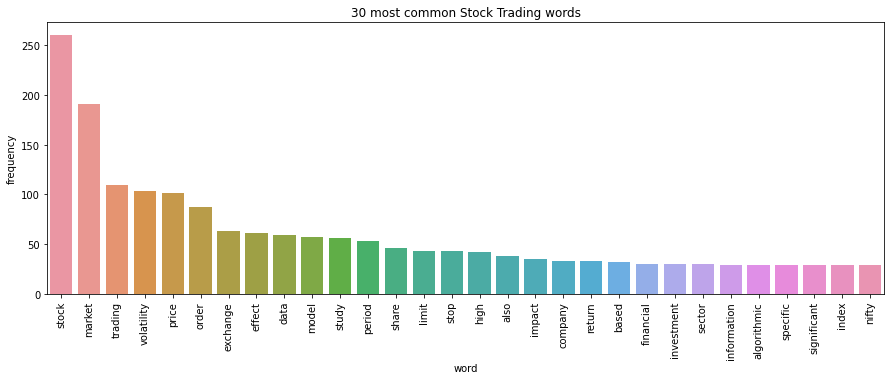

In [39]:
# Organise Data Security data
datasecurity_words = list(data.loc[data.Target == 'Data Security', 'cleaned_text'])
datasecurity_words = list(np.concatenate(datasecurity_words).flat)
datasecurity_words = Counter(datasecurity_words)
datasecurity_words = pd.DataFrame(datasecurity_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common Data Security words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = datasecurity_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common Data Security words")


# Organise Robo Advising words data
robo_words = list(data.loc[data.Target == 'Robo Advising', 'cleaned_text'])
robo_words = list(np.concatenate(robo_words).flat)
robo_words = Counter(robo_words)
robo_words = pd.DataFrame(robo_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common Robo Advising words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = robo_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common Robo Advising words")

# Organise Stock Trading words data
stock_words = list(data.loc[data.Target == 'Stock Trading', 'cleaned_text'])
stock_words = list(np.concatenate(stock_words).flat)
stock_words = Counter(stock_words)
stock_words = pd.DataFrame(stock_words.most_common(30), columns = ['word', 'frequency'])

# Plot most common Stock Trading words
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(x = 'word', y = 'frequency', data = stock_words, ax = ax)
plt.xticks(rotation = '90')
plt.title("30 most common Stock Trading words")

In [40]:
FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        974
Stock Trading        787
Robo Advising        737
Data Security        347

SyntaxError: ignored

In [42]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(data[['Text', 'Text_len', 'punct%']], data.Target, random_state = 42, test_size = 0.2)

# Check shape 
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (18160, 3)
Y_train shape: (18160,)
X_test shape: (4541, 3)
Y_test shape: (4541,)


In [43]:
# Instantiate and fit TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['Text'])

# Use fitted TfidfVectorizer to transform body text in X_train and X_test
tfidf_train = tfidf_vect.transform(X_train['Text'])
tfidf_test = tfidf_vect.transform(X_test['Text'])

# Recombine transformed body text with body_len and punct% features
X_train = pd.concat([X_train[['Text_len', 'punct%']].reset_index(drop = True), pd.DataFrame(tfidf_train.toarray())], axis = 1)
X_test = pd.concat([X_test[['Text_len', 'punct%']].reset_index(drop = True), pd.DataFrame(tfidf_test.toarray())], axis = 1)

# Check shape
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (18160, 9611)
Y_train shape: (18160,)
X_test shape: (4541, 9611)
Y_test shape: (4541,)


In [46]:
# Instantiate RandomForestClassifier with optimal set of hyperparameters 
rf = RandomForestClassifier(n_estimators = 100, max_depth = None, random_state = 42, n_jobs = -1)

# Fit model

rf_model = rf.fit(X_train, Y_train)


# Predict 
Y_pred = rf_model.predict(X_test)


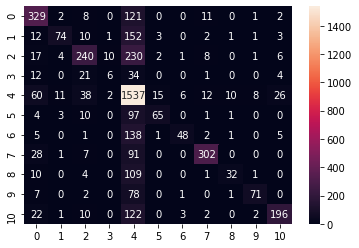

In [49]:
# Confusion matrix for RandomForestClassifier
matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix, annot = True, fmt = 'd')

In [51]:
#accuracy of the data is 63%
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)

0.6386258533362695
